### Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [79]:
df = pd.read_csv('/content/zomato_restaurants.csv', encoding='latin1')

###  Explore the dataset

In [82]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.0,Green,Very Good,355
2676,18421058,V. K. Pasta,1,New Delhi,"Shop 2, Chetan Complex, Surajmal Vihar, Anand ...",Anand Vihar,"Anand Vihar, New Delhi",77.306612,28.659586,"Italian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
5966,310164,Chawla Dhaba,1,New Delhi,"P-38, Industrial Area, Okhla Phase 2, New Delhi",Okhla Phase 2,"Okhla Phase 2, New Delhi",77.280084,28.535796,North Indian,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.0,Orange,Average,10
1504,309421,Citron - Hotel Haut.Monde,1,Gurgaon,"Hotel Haut Monde, Jharsa Road, Sector 15, Gurgaon","Hotel Haute.Monde, Sector 15","Hotel Haute.Monde, Sector 15, Gurgaon",77.038218,28.455396,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,2.7,Orange,Average,13
2331,1401948,Cafe Yolo,1,Indore,"65, Scheme 78-II, Opposite Prestige College, V...",Vijay Nagar,"Vijay Nagar, Indore",75.886362,22.761593,"Cafe, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,2,3.8,Yellow,Good,69


In [83]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# Get statistical information about the dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
# Check is there any missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines column has 9 missing values

---



In [9]:
# Drop the records having missing values
df=df.dropna()

In [10]:
# Check is there any duplicate values
df.duplicated().sum()

0

In [74]:
# Removing unnecessary columns from dataset
df = df.drop(columns=['Restaurant ID','Country Code','Address','Locality Verbose','Longitude','Latitude','Rating color','Rating text'],axis=1)

In [12]:
df.sample(5)

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
8409,Nawabi Mughlai Zaika,Noida,Sector 18,"North Indian, Mughlai",600,Indian Rupees(Rs.),No,Yes,No,No,2,3.3,19
9025,Kitchen Mantra,Noida,Sector 93,"North Indian, Mughlai, Chinese",550,Indian Rupees(Rs.),No,Yes,No,No,2,3.6,210
6817,Cafe Rock 'n' Rolla,New Delhi,Safdarjung,"Fast Food, American, Italian",600,Indian Rupees(Rs.),No,Yes,No,No,2,3.6,103
227,Home Plate Grill,Dalton,Ringgold,"American, BBQ, Southern",10,Dollar($),No,No,No,No,1,4.2,112
9407,Teacup,Manchester,Northern Quarter,"British, Contemporary",45,Pounds(£),No,No,No,No,3,4.1,98


In [13]:
# Number of rows and columns in dataset
print('Columns:',df.shape[1])
print('Rows:',df.shape[0])

Columns: 13
Rows: 9542


### Visualize the dataset and gather insights

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   City                  9542 non-null   object 
 2   Locality              9542 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9542 non-null   int64  
 5   Currency              9542 non-null   object 
 6   Has Table booking     9542 non-null   object 
 7   Has Online delivery   9542 non-null   object 
 8   Is delivering now     9542 non-null   object 
 9   Switch to order menu  9542 non-null   object 
 10  Price range           9542 non-null   int64  
 11  Aggregate rating      9542 non-null   float64
 12  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.0+ MB


**Popular Cuisines:**
Identify the top cuisines that are most commonly offered by restaurants in the dataset.

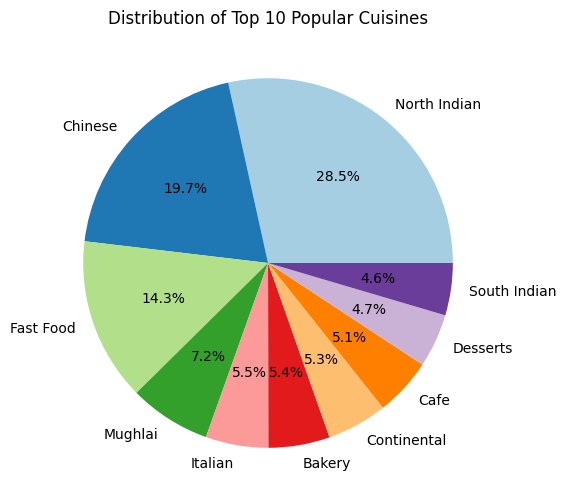

In [15]:
cuisine_counts = df['Cuisines'].str.split(', ', expand=True).stack().value_counts()

top_cuisines = cuisine_counts.head(10)

plt.figure(figsize=(6,6))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors)
plt.title('Distribution of Top 10 Popular Cuisines')
plt.show()

The major cuisines that are offered by restaurants are North Indian, Chinese and Fast Food.

**Table Booking and Online Delivery Services:**

Evaluate the popularity of table booking and online delivery services among restaurants.

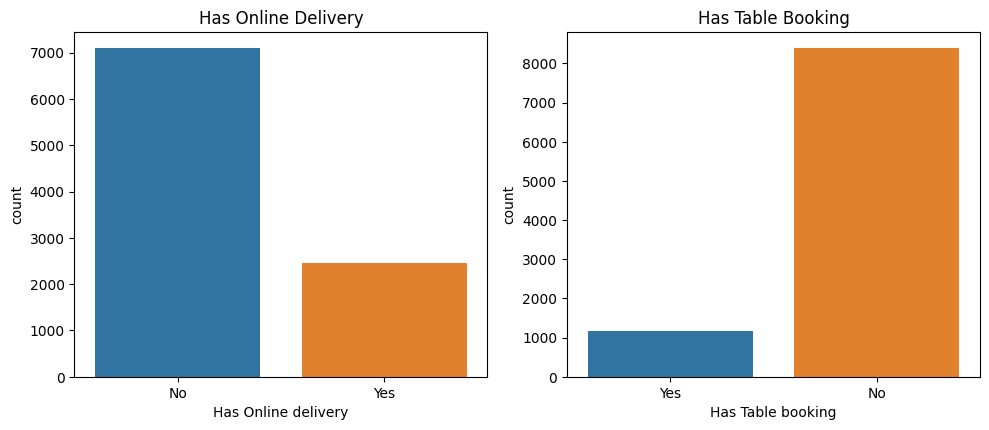

In [16]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Has Online delivery')
plt.title('Has Online Delivery')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Has Table booking')
plt.title('Has Table Booking')
plt.show()


There are very less number of restaurants that have a table booking and also provide online delivery.


**Average Rating Distribution:**

Show the distribution of restaurant ratings. Understand the overall satisfaction of customers.

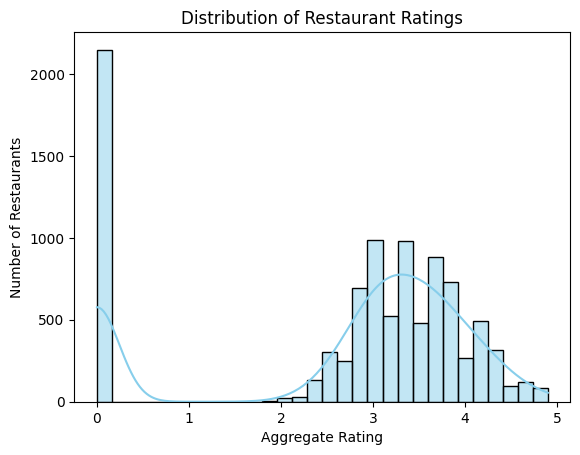

In [17]:
# Histogram for the distribution of restaurant ratings using Seaborn
sns.histplot(data=df, x='Aggregate rating', bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')

# Show the plot
plt.show()

There are two prominent groups of restaurants with distinct rating patterns and cutomers have rated in more numbers for the restaurants which have bad quality.

**Affordability Range:**

Identify the most common price range and understand the overall pricing landscape.

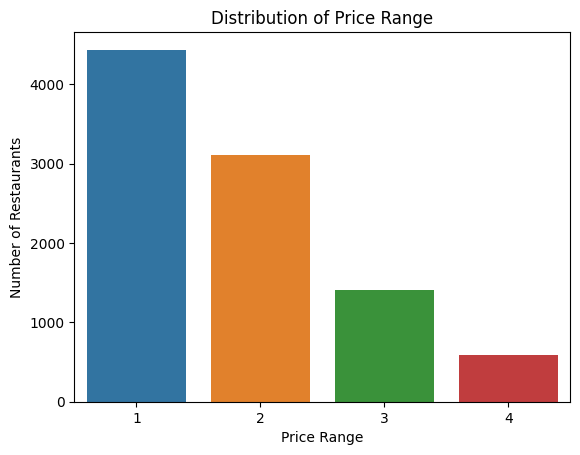

In [18]:
sns.countplot(data=df, x='Price range')

plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


We can observe a pattern that as the prices go high the number of expensive restaurants decreases, as there are less number premium dinning restaurants compared to standards one.

**Identification of High-End Restaurants:**

Top 10 most expensive restaurants based on their 'Average Cost for two.'

In [88]:
def convert_to_dollar(value, currency):
    conversion_rates = {
        'Botswana Pula(P)': 0.092,
        'Brazilian Real(R$)': 0.192,
        'Dollar($)': 1.0,
        'Emirati Diram(AED)': 0.272,
        'Indian Rupees(Rs.)': 0.014,
        'NewZealand($)': 0.706,
        'Pounds(\x8c£)': 1.38,
        'Qatari Rial(QR)': 0.27,
        'Rand(R)': 0.068,
        'Sri Lankan Rupee(LKR)': 0.0053,
        'Turkish Lira(TL)': 0.12
    }

    # Convert the value to Dollar
    if currency in conversion_rates:
        value_in_dollar = value * conversion_rates[currency]
        return value_in_dollar
    else:
        return None

df['Average Cost for two in USD'] = df.apply(lambda x:convert_to_dollar(x['Average Cost for two'],x['Currency']),axis=1)

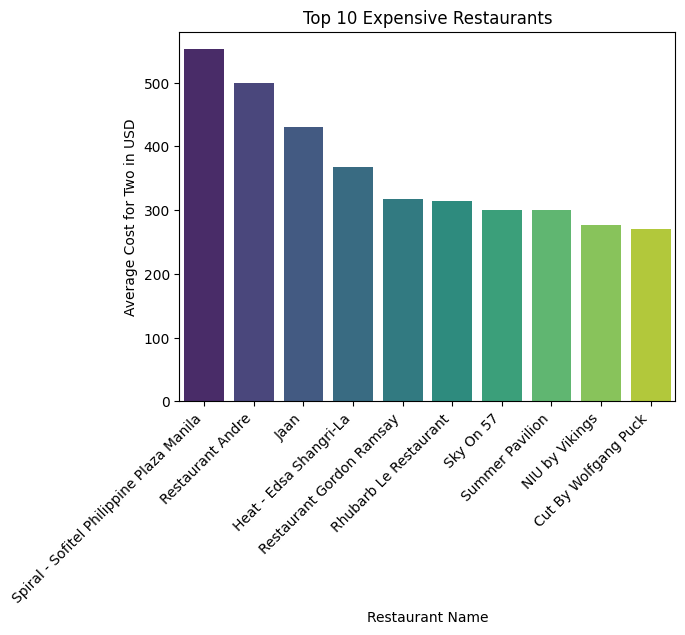

In [100]:
top_10_expensive = df.sort_values(by='Average Cost for two in USD', ascending=False).head(10)

sns.barplot(data=top_10_expensive, x='Restaurant Name', y='Average Cost for two in USD', palette='viridis')

plt.xlabel('Restaurant Name')
plt.ylabel('Average Cost for Two in USD')
plt.title('Top 10 Expensive Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()


Above are the top 10 most expensive restuarants based average cost for two.

**Distribution of Ratings:**

Give an Overview of how ratings are distributed among the restaurants.

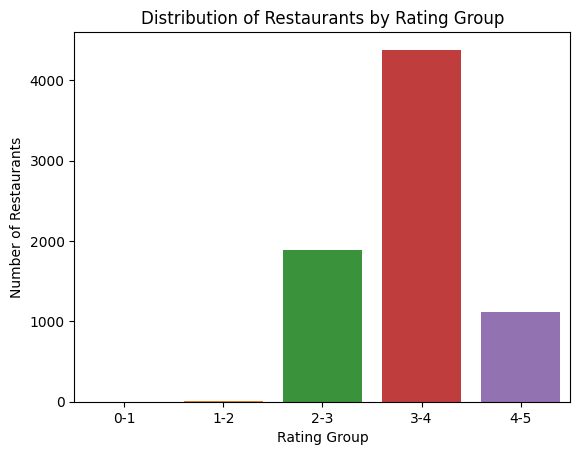

In [20]:
# Create bins for ratings
bins = [0, 1, 2, 3, 4, 5]

# Create a new column 'Rating Group' based on the bins
df['Rating Group'] = pd.cut(df['Aggregate rating'], bins=bins, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

sns.countplot(data=df, x='Rating Group')

plt.title('Distribution of Restaurants by Rating Group')
plt.xlabel('Rating Group')
plt.ylabel('Number of Restaurants')
plt.show()

The customers have given a significant rating between 2 to 5 to restaurants and not too much bad rating is given if they did not like it.

**Effect of Average Cost on Ratings:**

Investigate if there's a correlation between the average cost for two and restaurant ratings.

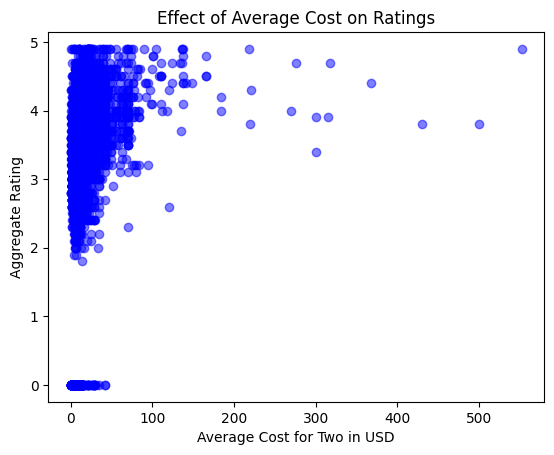

In [96]:
plt.scatter(df['Average Cost for two in USD'], df['Aggregate rating'], alpha=0.5, color='blue')

plt.xlabel('Average Cost for Two in USD')
plt.ylabel('Aggregate Rating')
plt.title('Effect of Average Cost on Ratings')
plt.show()

 There is no specific pattern between the average cost for two and restaurant ratings, so we can conclude there is no correlation.

**Premium Dining Destinations:**

Identify which city has most expensive dinning in terms of Average Cost for two.

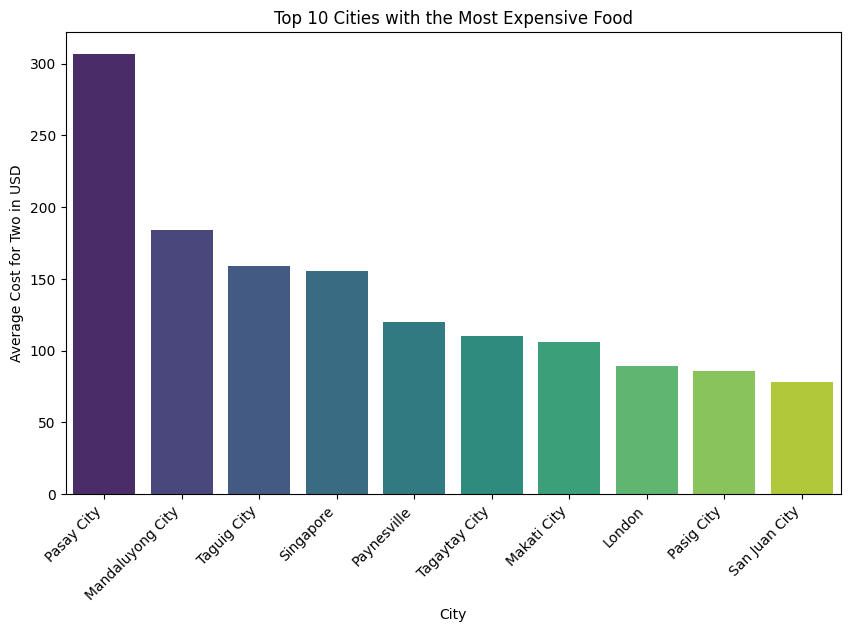

In [98]:
average_cost_by_city = df.groupby('City')['Average Cost for two in USD'].mean().sort_values(ascending=False)

most_expensive_city = average_cost_by_city.idxmax()
highest_average_cost = average_cost_by_city.max()
average_cost_by_city = df.groupby('City')['Average Cost for two in USD'].mean().sort_values(ascending=False).head(10)

# Bar plot for the top 10 expensive cities
plt.figure(figsize=(10, 6))
sns.barplot(x=average_cost_by_city.index, y=average_cost_by_city.values, palette='viridis')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Average Cost for Two in USD')
plt.title('Top 10 Cities with the Most Expensive Food')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



Here are the top 10 cities which have most expensive restuarants based average cost for two.

**Price Range and Popularity:**

Explore if there's a correlation between the price range and the popularity of restaurants.

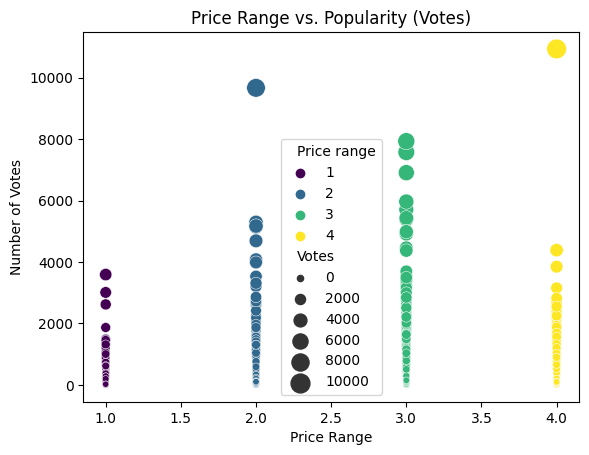

In [21]:
sns.scatterplot(data=df, x='Price range', y='Votes', hue='Price range', palette='viridis', size='Votes', sizes=(20, 200))

plt.title('Price Range vs. Popularity (Votes)')
plt.xlabel('Price Range')
plt.ylabel('Number of Votes')
plt.show()


From above we can interpret that as the price range increases, the customers have given more number of votes to the premium restuarants.

### Conclusion:

The predominant cuisines offered by restaurants in the dataset are North Indian, Chinese, and Fast Food as majority of restuarants are located in North India.

The absence of a clear correlation between the average cost for two and restaurant ratings implies that customers do not necessarily equate higher prices with better satisfaction.

The distribution of rating suggests a higher volume of ratings for restaurants with lower ratings, emphasizing the need for attention to quality improvement.

The positive correlation observed between price range and the popularity of restaurants, as indicated by customer votes, suggests that customers are willing to engage more with premium establishments.